In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

## LabelEncoder()

In [2]:
X=np.array(['chat','chien','chat','Oiseau'])

In [3]:
encoder=LabelEncoder()
encoder.fit(X)

LabelEncoder()

In [4]:
encoder.classes_

array(['Oiseau', 'chat', 'chien'], dtype='<U6')

In [5]:
encoder.transform(X)

array([1, 2, 1, 0])

In [6]:
# ou encore
encoder.fit_transform(X)

array([1, 2, 1, 0], dtype=int64)

In [7]:
encoder.inverse_transform(np.array([0,1,1,0,2]))

array(['Oiseau', 'chat', 'chat', 'Oiseau', 'chien'], dtype='<U6')

In [8]:
X=np.array([['chat','poils'],
           ['chien','poils'],
           ['chat','poils'],
           ['oiseau','plumes']])

## OrdinalEncoder()

In [9]:
from sklearn.preprocessing import OrdinalEncoder # pour traiter un tableau avec plusieurs variables

In [10]:
encoder=OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

## LabelBinarizer()

In [11]:
from sklearn.preprocessing import LabelBinarizer

In [12]:
y=np.array(['chat','chien','chat','Oiseau'])

In [13]:
encoder=LabelBinarizer()
encoder.fit_transform(y)

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [14]:
encoder=LabelBinarizer(sparse_output=True) # pour compresser
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [15]:
encoder.inverse_transform(np.array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]]))

array(['chat', 'chien', 'chat', 'Oiseau'], dtype='<U6')

## OneHotEncoder()

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
x=np.array([['chat','poils'],
           ['chien','poils'],
           ['chat','poils'],
           ['oiseau','plumes']])

In [18]:
encoder=OneHotEncoder()
encoder.fit_transform(x)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

## Bonus

In [19]:
y_train=np.array(['chat','chien','chat','Oiseau'])

In [20]:
encoder=LabelEncoder()
encoder.fit_transform(y)

array([1, 2, 1, 0], dtype=int64)

In [21]:
y_test=np.array(['poisson'])
encoder.transform(y_test)

ValueError: y contains previously unseen labels: 'poisso'

In [ ]:
# ils est dont important de creer ses propres fonctrions d'encodage

## Normalisation MinMax

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
x=np.array([[70],[80],[120]])

In [24]:
scaler=MinMaxScaler()
scaler.fit_transform(x)

array([[0. ],
       [0.2],
       [1. ]])

In [25]:
x_test=np.array([[90]])
scaler.transform(x_test)

array([[0.4]])

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

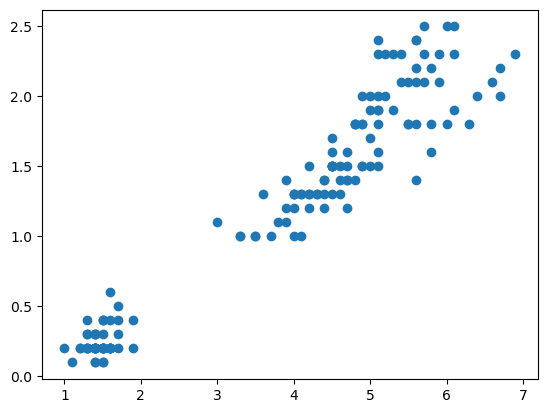

In [27]:
iris=load_iris()
X=iris.data

plt.scatter(X[:,2],X[:,3])
plt.show()

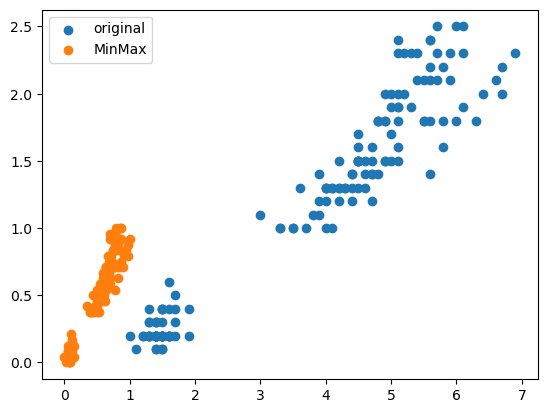

In [28]:
X_MinMax=scaler.fit_transform(X)

plt.scatter(X[:,2],X[:,3],label='original')
plt.scatter(X_MinMax[:,2],X_MinMax[:,3],label='MinMax')
plt.legend()
plt.show()

## Standardisation

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
x=np.array([[70],[80],[120]])

In [31]:
scaler=StandardScaler()
scaler.fit_transform(x)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

In [32]:
print(scaler.fit_transform(x).mean())
print(scaler.fit_transform(x).std())

-7.401486830834377e-17
1.0


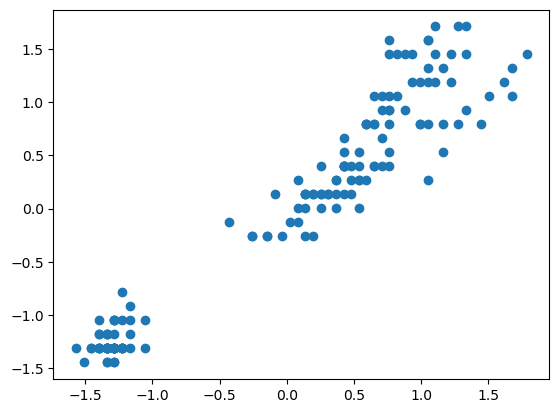

In [33]:
scaler.fit_transform(X) # X pour les fleurs d'iris

X_stdsc=scaler.fit_transform(X) 
plt.scatter(X_stdsc[:,2],X_stdsc[:,3])
plt.show()

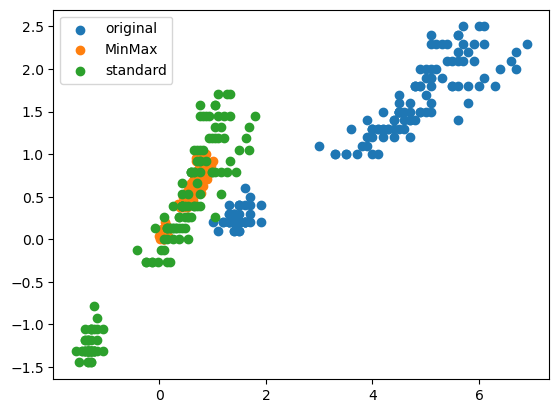

In [34]:
plt.scatter(X[:,2],X[:,3],label='original')
plt.scatter(X_MinMax[:,2],X_MinMax[:,3],label='MinMax')
plt.scatter(X_stdsc[:,2],X_stdsc[:,3],label='standard')

plt.legend()
plt.show()

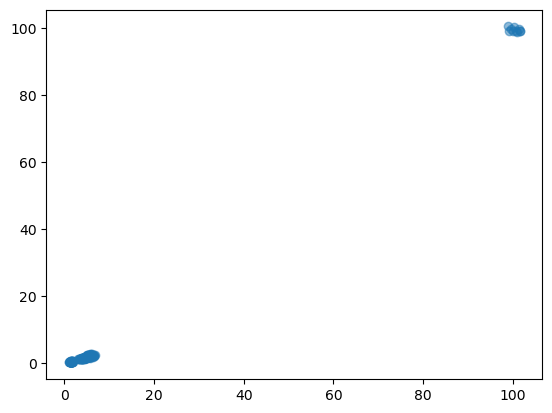

In [35]:
iris=load_iris()
X=iris.data

Outliers=np.full((10,4),100)+np.random.randn(10,4)
Xo=np.vstack((X,Outliers))


plt.scatter(Xo[:,2],Xo[:,3],alpha=0.5,label='original')
plt.show()

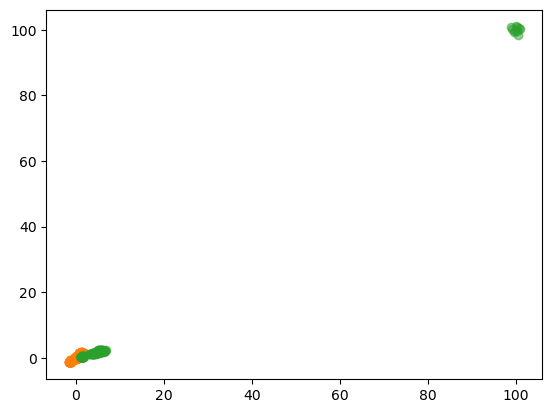

In [36]:
iris=load_iris()
X=iris.data

Outliers=np.full((10,4),100)+np.random.randn(10,4)
Xo=np.vstack((X,Outliers))

plt.scatter(X_MinMax[:,2],X_MinMax[:,3],label='MinMax')
plt.scatter(X_stdsc[:,2],X_stdsc[:,3],label='standard')
plt.scatter(Xo[:,2],Xo[:,3],alpha=0.5,label='original')
plt.show()

lorsqu'on a des valeurs aberantes(outliers) dans notre dataset on utilise la methode RobustScaler plutot que MinMaxScaler et StandardScaler

In [37]:
from sklearn.preprocessing import RobustScaler

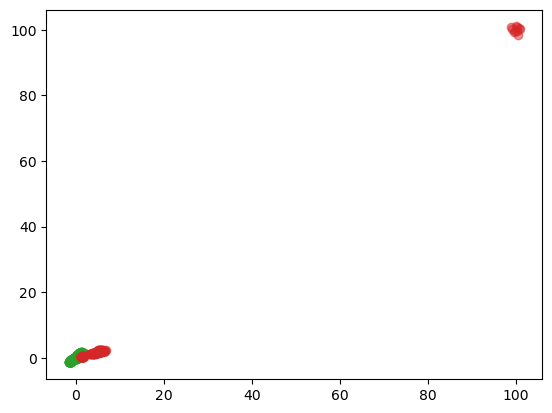

In [38]:
X_robust=RobustScaler().fit_transform(X)

plt.scatter(X_robust[:,2],X_robust[:,3],label='robust')
plt.scatter(X_MinMax[:,2],X_MinMax[:,3],label='MinMax')
plt.scatter(X_stdsc[:,2],X_stdsc[:,3],label='standard')
plt.scatter(Xo[:,2],Xo[:,3],alpha=0.5,label='original')
plt.show()

## PolynomialFeatures

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
X=np.array([[1],[2],[0.5]])

In [41]:
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

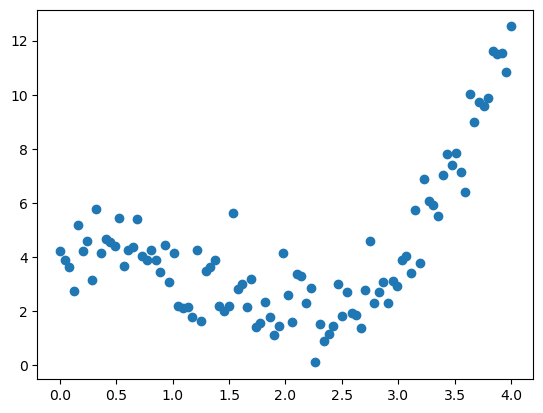

In [42]:
X=np.linspace(0,4,100).reshape((100,1))
y=X**2 + 5*np.cos(X) + np.random.randn(100,1)

plt.scatter(X,y)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

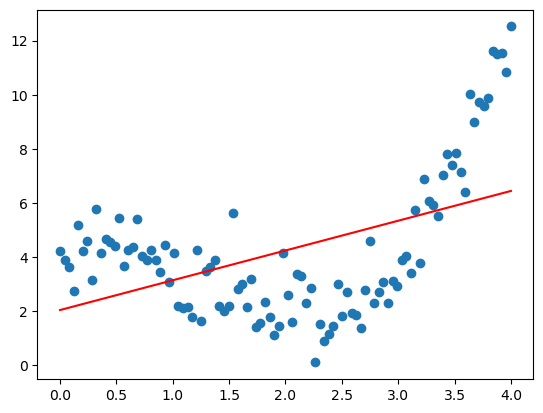

In [44]:
model=LinearRegression().fit(X,y)
y_pred=model.predict(X)

plt.scatter(X,y)
plt.plot(X,y_pred,c='r')
plt.show()

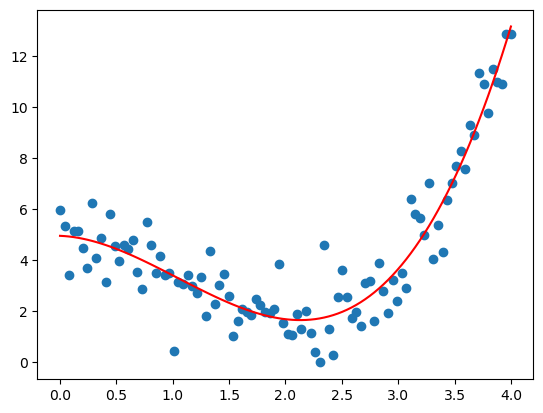

In [45]:
X=np.linspace(0,4,100).reshape((100,1))
y=X**2 + 5*np.cos(X) + np.random.randn(100,1)

X_poly=PolynomialFeatures(3).fit_transform(X)

model=LinearRegression().fit(X_poly,y)
y_pred=model.predict(X_poly)

plt.scatter(X,y)
plt.plot(X,y_pred,c='r')
plt.show()

## Binerarizer, kBinsDiscretizer

In [46]:
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import KBinsDiscretizer

In [47]:
x=np.linspace(0,5,10).reshape((10,1))
x

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

In [48]:
np.hstack((x,Binarizer(threshold=3).fit_transform(x)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [49]:
KBinsDiscretizer(n_bins=6).fit_transform(x).toarray() # pour creer differente categories

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

## Pipelines

In [51]:
from sklearn.model_selection import train_test_splitn_test_split
from sklearn.linear_model import SGDClassifier

In [52]:
X=iris.data
y=iris.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [54]:
# Transfoermer
scaler=StandardScaler()
X_train_transformed=scaler.fit_transform(X_train)


# Estimateur
model=SGDClassifier(random_state=0)
model.fit(X_train_transformed,y_train)

#test
X_test_transformed=scaler.transform(X_test)
print(model.score(X_test_transformed,y_test))
print(model.predict(X_test_transformed))

0.9333333333333333
[2 2 1 1 2 1 2 1 2 2 2 2 2 0 0 0 2 2 2 1 2 2 2 0 2 0 0 2 0 2]


In [55]:
from sklearn.pipeline import make_pipeline

In [56]:
model=make_pipeline(StandardScaler(),SGDClassifier(random_state=0))

model.fit(X_train,y_train)
print(model.score(X_test,y_test))
print(model.predict(X_test))

0.9333333333333333
[2 2 1 1 2 1 2 1 2 2 2 2 2 0 0 0 2 2 2 1 2 2 2 0 2 0 0 2 0 2]


In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
model=make_pipeline(PolynomialFeatures(),
                    StandardScaler(),
                    SGDClassifier(random_state=0))
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [68]:
params={'polynomialfeatures__degree':[2,3,4],
        'sgdclassifier__penalty':['11','12','elasticnet']}

grid=GridSearchCV(model,params,cv=4)
grid.fit(X_train,y_train)

C:\Users\DONFACK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
24 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DONFACK\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DONFACK\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\DONFACK\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 891, in fit
    self._validate_params()
  File "

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['11', '12', 'elasticnet']})

In [69]:
grid.best_params_

{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'elasticnet'}

In [70]:
 grid.best_score_

0.9666666666666667

In [72]:
grid1=grid.best_estimator_
grid1

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(penalty='elasticnet', random_state=0))])

In [74]:
grid1.score(X_test,y_test)

0.9